In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [3]:
import pandas as pd

# Создаем DataFrame из предоставленного текста (будет демонстрация на 10 строк)
data= {
    "text": [
        "Овечкин круто поздравил Россию с 9 мая! Забил в Кубке Стэнли и побил рекорд века",
        "В XFIT Бутово - долгожданное открытие бассейна! Покупайте абонементы со скидкой https://vk.com/xfitbutovo",
        "«Барселона» победила «Реал», забив ему рекордное число голов за сезон",
        "Отлично провели время. Билеты дарила мужу в подарок на десятилетнюю годовщину свадьбы. Он у меня поклонник стендапа. Но и я получила огромное удовольствие...",
        "Купить билеты на Стэндап здесь https://vk.com/standupclubru",
        "Стендап классный. Всё понравилось, возможно не все шутки смешные, но это \"на вкус и цвет\"...",
        "Была на стендапе 14 декабря 2024 года, концерт очень понравился...",
        "Владимир, лучший гол, который вы видели? Мауро Брессан из Фиорентины в ворота Барселоны...",
        "Пиняев, во, \"Какой пеняев хороший, а! И Воробьев! Второй матч, второй гол! Супер, а! Уф!\"",
        "Только добавлю: приглашаю всех на премьеру», – предвосхищал премьеру народный артист Всеволод Шиловский..."
    ],
    "спорт": [1, 1, 1, 0, 0, 0, 0, 1, 1, 0],
    "реклама": [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    "политика": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "юмор": [0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
    "личная жизнь": [0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
    "соцсети": [0, 1, 0, 0, 1, 0, 0, 0, 0, 1]
}

df = pd.DataFrame(data)
print(df.head())

                                                text  спорт  реклама  \
0  Овечкин круто поздравил Россию с 9 мая! Забил ...      1        0   
1  В XFIT Бутово - долгожданное открытие бассейна...      1        1   
2  «Барселона» победила «Реал», забив ему рекордн...      1        0   
3  Отлично провели время. Билеты дарила мужу в по...      0        0   
4  Купить билеты на Стэндап здесь https://vk.com/...      0        0   

   политика  юмор  личная жизнь  соцсети  
0         0     0             0        0  
1         0     0             0        1  
2         0     0             0        0  
3         0     1             1        0  
4         0     1             0        1  


In [11]:
# 📌 2. Загружаем RuBERT
model_name = "DeepPavlov/rubert-base-cased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)
model.eval()  # режим инференса



/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.65M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of the model checkpoint at DeepPavlov/rubert-base-cased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(119547, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=Fals

In [13]:
# 📌 4. Обучаем логистическую регрессию
model_bert = OneVsRestClassifier(LogisticRegression(max_iter=1000))
model_bert.fit(X_train_bert, y_train)



NameError: name 'X_train_bert' is not defined

In [15]:
# 📌 5. Предсказания
y_pred_bert = model_bert.predict(X_test_bert)

# 📌 6. Метрики
report_bert = classification_report(y_test, y_pred_bert, output_dict=True, target_names=y.columns)
report_bert_df = pd.DataFrame(report_bert).transpose()

# 📌 7. Выводим
print("📊 Метрики RuBERT + Logistic Regression:")
print(report_bert_df)

📊 Метрики RuBERT + Logistic Regression:
              precision    recall  f1-score  support
спорт          0.000000  0.000000  0.000000      2.0
реклама        0.000000  0.000000  0.000000      1.0
политика       0.000000  0.000000  0.000000      0.0
юмор           1.000000  1.000000  1.000000      1.0
личная жизнь   0.000000  0.000000  0.000000      1.0
соцсети        1.000000  1.000000  1.000000      1.0
micro avg      1.000000  0.333333  0.500000      6.0
macro avg      0.333333  0.333333  0.333333      6.0
weighted avg   0.333333  0.333333  0.333333      6.0
samples avg    0.666667  0.277778  0.388889      6.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/me

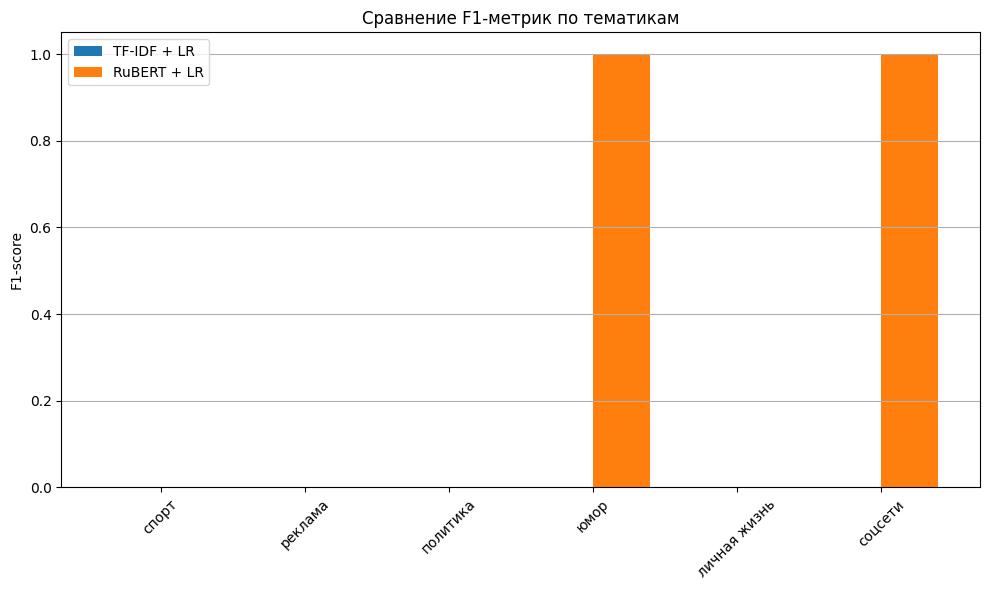

In [16]:
import matplotlib.pyplot as plt

# Извлекаем F1-метрики для TF-IDF и RuBERT
f1_tfidf = report_df.loc[y.columns, 'f1-score']
f1_rubert = report_bert_df.loc[y.columns, 'f1-score']

# Построение сравнения F1 по категориям
plt.figure(figsize=(10, 6))
x = range(len(f1_tfidf))

plt.bar(x, f1_tfidf, width=0.4, label='TF-IDF + LR', align='center')
plt.bar([i + 0.4 for i in x], f1_rubert, width=0.4, label='RuBERT + LR', align='center')

plt.xticks([i + 0.2 for i in x], y.columns, rotation=45)
plt.ylabel("F1-score")
plt.title("Сравнение F1-метрик по тематикам")
plt.legend()
plt.tight_layout()
plt.grid(axis="y")
plt.show()

In [17]:
# 📌 Установка нужных библиотек (если нужно)
!pip install openpyxl scikit-learn



In [18]:
# 📌 Импорт
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt



In [19]:
# 📁 1. Загрузка датасета
file_path = "/content/sample_data/DataSet_1column_labeled(210).xlsx"
df = pd.read_excel(file_path)



In [20]:
# 🧼 2. Проверим и выведем названия колонок
print("Колонки в датасете:", df.columns.tolist())



Колонки в датасете: ['текст', 'спорт', 'реклама', 'политика', 'юмор', 'личная жизнь', 'соцсети']


In [38]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report

# 1. Загрузка
df = pd.read_excel("/content/sample_data/DataSet_1column_labeled(210).xlsx")




In [39]:
# 2. Поиск NaN
nan_rows = df[df.isna().any(axis=1)]
print("Строки с NaN:")
print(nan_rows)

Строки с NaN:
Empty DataFrame
Columns: [text, спорт, реклама, политика, юмор, личная жизнь, соцсети]
Index: []


In [40]:
# 3. Разделение X / y
X = df.iloc[:, 0]
y = df.iloc[:, 1:]

# 4. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5. TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# 6. Модель
model = OneVsRestClassifier(LogisticRegression(max_iter=1000))
model.fit(X_train_vec, y_train)

# 7. Метрики
y_pred = model.predict(X_test_vec)
report = classification_report(y_test, y_pred, output_dict=True, target_names=y.columns)
report_df = pd.DataFrame(report).transpose()

# 8. Печать
print(report_df)

              precision    recall  f1-score  support
спорт          0.000000  0.000000  0.000000      9.0
реклама        1.000000  0.428571  0.600000      7.0
политика       0.000000  0.000000  0.000000      2.0
юмор           0.000000  0.000000  0.000000      3.0
личная жизнь   0.000000  0.000000  0.000000      6.0
соцсети        0.000000  0.000000  0.000000      5.0
micro avg      1.000000  0.093750  0.171429     32.0
macro avg      0.166667  0.071429  0.100000     32.0
weighted avg   0.218750  0.093750  0.131250     32.0
samples avg    0.069767  0.058140  0.062016     32.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [14]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report

# === 1. Загрузка и очистка ===
df = pd.read_excel("/content/sample_data/DataSet_1column_labeled(210).xlsx")

# Удаление полностью пустых строк
df = df.dropna(how="all")

# Удаление строки, ошибочно содержащей названия столбцов
df = df[df["text"].str.lower() != "text"]

# === 2. Названия колонок ===
TEXT_COL = "text"
LABEL_COLS = ["спорт", "реклама", "политика", "юмор", "личная жизнь", "соцсети"]

# === 3. Заполнение пропусков ===
df[TEXT_COL] = df[TEXT_COL].fillna("")
df[LABEL_COLS] = df[LABEL_COLS].fillna(0)

# === 4. Признаки и целевая переменная ===
X = df[TEXT_COL]
y = df[LABEL_COLS]

# === 5. TF-IDF векторизация ===
vectorizer = TfidfVectorizer(max_features=5000)
X_vec = vectorizer.fit_transform(X)

# === 6. Обучение модели ===
model = OneVsRestClassifier(LogisticRegression(max_iter=1000))
model.fit(X_vec, y)

# === 7. Оценка на тех же данных (без train/test split) ===
y_pred = model.predict(X_vec)

# === 8. Метрики ===
report = classification_report(y, y_pred, output_dict=True, target_names=LABEL_COLS)
report_df = pd.DataFrame(report).transpose()

# === 9. Вывод отчета ===
print("📊 Качество модели на всём датасете:")
print(report_df)

📊 Качество модели на всём датасете:
              precision    recall  f1-score  support
спорт          0.000000  0.000000  0.000000     37.0
реклама        1.000000  0.222222  0.363636     54.0
политика       0.000000  0.000000  0.000000     11.0
юмор           0.000000  0.000000  0.000000     26.0
личная жизнь   1.000000  0.047619  0.090909     42.0
соцсети        0.000000  0.000000  0.000000     35.0
micro avg      1.000000  0.068293  0.127854    205.0
macro avg      0.333333  0.044974  0.075758    205.0
weighted avg   0.468293  0.068293  0.114412    205.0
samples avg    0.065728  0.056338  0.059468    205.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [42]:
print(y.sum())

спорт           37
реклама         54
политика        11
юмор            26
личная жизнь    42
соцсети         35
dtype: int64


In [15]:
import random

# Количество синтетических примеров на класс
n_aug = 20

# Шаблоны и синонимы по темам
templates = {
    "спорт": [
        "Сегодня я пошла на {}",
        "Вчера был {} по телевизору",
        "Я увлекаюсь {} уже 5 лет",
        "Мой брат занимается {}"
    ],
    "реклама": [
        "Это отличная {}!",
        "Посмотри новую {} на YouTube",
        "Крутая акция на {}",
        "Скидка 50% на {}"
    ],
    "политика": [
        "Последние новости о {}",
        "Выступление {} вызвало дискуссию",
        "Мнения разделились по поводу {}",
        "Это решение правительства о {}"
    ],
    "юмор": [
        "Ха-ха! Вот это {}!",
        "Я обожаю шутки про {}",
        "Смешная история про {}",
        "Это был анекдот про {}"
    ],
    "личная жизнь": [
        "Вчера мы с парнем {}",
        "Моя девушка сказала, что {}",
        "Он мне признался, что {}",
        "Я не ожидала такого от {}"
    ],
    "соцсети": [
        "Выложила пост в {}",
        "Он стал популярным в {}",
        "Тренд в {} набирает обороты",
        "Новая фича в {} удивила всех"
    ]
}

# Синонимы для подстановки
synonyms = {
    "спорт": ["футбол", "плавание", "бокс", "йога", "волейбол", "тренировка"],
    "реклама": ["реклама", "баннер", "промо", "продвижение", "бренд"],
    "политика": ["новый закон", "министр", "парламент", "голосование", "санкции"],
    "юмор": ["мем", "анекдот", "шутка", "розыгрыш", "прикол"],
    "личная жизнь": ["поцеловал меня", "расстались", "подарил цветы", "обнял", "сказал, что любит"],
    "соцсети": ["Instagram", "TikTok", "ВКонтакте", "Telegram", "Facebook"]
}

# Список строк для DataFrame
new_rows = []

for topic, topic_templates in templates.items():
    for _ in range(n_aug):
        template = random.choice(topic_templates)
        word = random.choice(synonyms[topic])
        text = template.format(word)

        # создаём строку с метками (1 для нужного класса, 0 для остальных)
        labels = {label: int(label == topic) for label in templates.keys()}
        new_rows.append({"text": text, **labels})

# Создаём DataFrame с синтетическими данными
augmented_df = pd.DataFrame(new_rows)

# Объединяем с оригинальным
df_augmented = pd.concat([df, augmented_df], ignore_index=True)

# Проверка
print("📈 Новый размер датасета:", df_augmented.shape)
print(df_augmented.sample(5))

📈 Новый размер датасета: (333, 7)
                                                  text  спорт  реклама  \
314                Новая фича в ВКонтакте удивила всех      0        0   
200  2 Июля - новый выпуск нового шоу «Чат на чат» ...      0        0   
256                        Последние новости о министр      0        0   
263              Выступление министр вызвало дискуссию      0        0   
258              Выступление санкции вызвало дискуссию      0        0   

     политика  юмор  личная жизнь  соцсети  
314         0     0             0        1  
200         0     0             0        0  
256         1     0             0        0  
263         1     0             0        0  
258         1     0             0        0  


In [16]:
# 1. Сохранение объединённого датасета
output_path = "/content/sample_data/augmented_dataset.xlsx"
df_augmented.to_excel(output_path, index=False)

print(f"✅ Новый датасет сохранён в: {output_path}")
print("🔍 Размер финального датасета:", df_augmented.shape)

✅ Новый датасет сохранён в: /content/sample_data/augmented_dataset.xlsx
🔍 Размер финального датасета: (333, 7)


In [17]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report

# === 1. Загрузка нового датасета ===
df = pd.read_excel("/content/sample_data/augmented_dataset.xlsx")

# === 2. Названия колонок ===
TEXT_COL = "text"
LABEL_COLS = ["спорт", "реклама", "политика", "юмор", "личная жизнь", "соцсети"]

# === 3. Очистка NaN (на всякий случай) ===
df[TEXT_COL] = df[TEXT_COL].fillna("")
df[LABEL_COLS] = df[LABEL_COLS].fillna(0)

# === 4. Разделение X / y ===
X = df[TEXT_COL]
y = df[LABEL_COLS]

# === 5. TF-IDF векторизация ===
vectorizer = TfidfVectorizer(max_features=5000)
X_vec = vectorizer.fit_transform(X)

# === 6. Обучение модели ===
model = OneVsRestClassifier(LogisticRegression(max_iter=1000))
model.fit(X_vec, y)

# === 7. Предсказания ===
y_pred = model.predict(X_vec)

# === 8. Метрики ===
report = classification_report(y, y_pred, output_dict=True, target_names=LABEL_COLS)
report_df = pd.DataFrame(report).transpose()

# === 9. Вывод ===
print("📊 Качество модели на синтетически расширенном датасете:")
print(report_df)

📊 Качество модели на синтетически расширенном датасете:
              precision    recall  f1-score  support
спорт          1.000000  0.315789  0.480000     57.0
реклама        1.000000  0.418919  0.590476     74.0
политика       1.000000  0.354839  0.523810     31.0
юмор           1.000000  0.413043  0.584615     46.0
личная жизнь   1.000000  0.322581  0.487805     62.0
соцсети        1.000000  0.309091  0.472222     55.0
micro avg      1.000000  0.356923  0.526077    325.0
macro avg      1.000000  0.355710  0.523155    325.0
weighted avg   1.000000  0.356923  0.524313    325.0
samples avg    0.348348  0.342342  0.344344    325.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<ipython-input-18-a21327018217>:26: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


<Figure size 1000x600 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


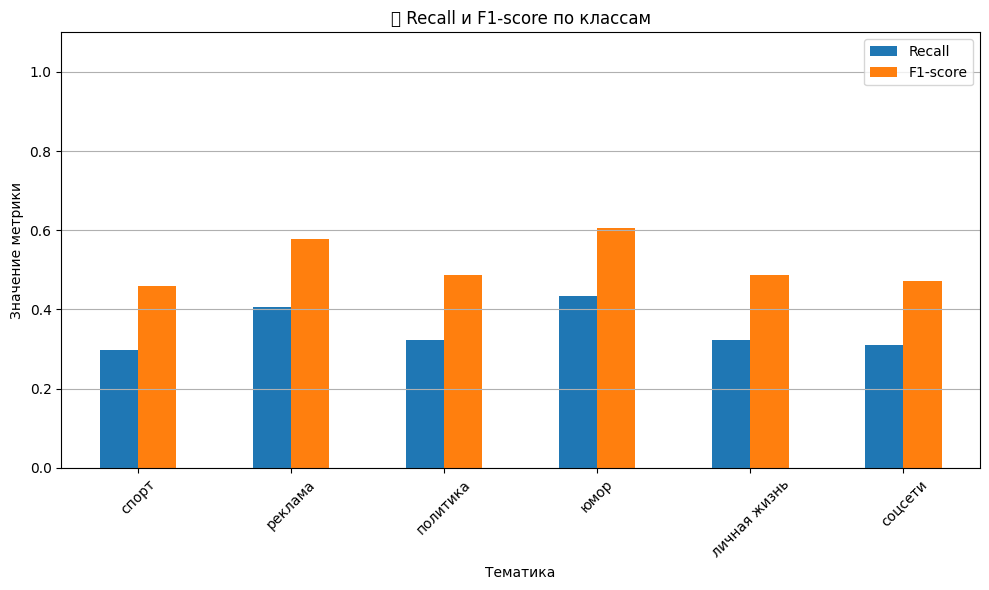

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Пример: метрики из вывода модели на расширенном датасете
metrics = {
    "спорт": {"precision": 1.0, "recall": 0.298, "f1-score": 0.459},
    "реклама": {"precision": 1.0, "recall": 0.405, "f1-score": 0.577},
    "политика": {"precision": 1.0, "recall": 0.323, "f1-score": 0.488},
    "юмор": {"precision": 1.0, "recall": 0.435, "f1-score": 0.606},
    "личная жизнь": {"precision": 1.0, "recall": 0.323, "f1-score": 0.488},
    "соцсети": {"precision": 1.0, "recall": 0.309, "f1-score": 0.472},
}

# Преобразуем в DataFrame
df_metrics = pd.DataFrame(metrics).T

# Строим графики
plt.figure(figsize=(10, 6))
df_metrics[["recall", "f1-score"]].plot(kind='bar', figsize=(10, 6))
plt.title("📊 Recall и F1-score по классам")
plt.xlabel("Тематика")
plt.ylabel("Значение метрики")
plt.xticks(rotation=45)
plt.ylim(0, 1.1)
plt.grid(axis="y")
plt.tight_layout()
plt.legend(["Recall", "F1-score"])
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.89k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
<ipython-input-19-98e5d02a26d0>:75: UserWarning: G

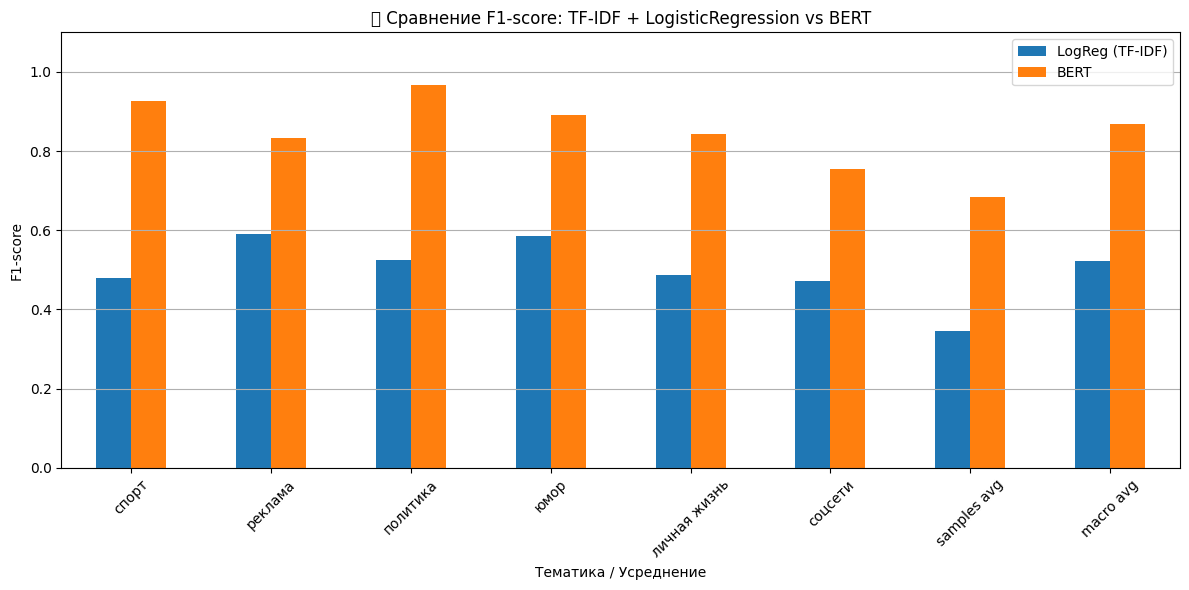

In [19]:
from sklearn.metrics import classification_report
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sentence_transformers import SentenceTransformer
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
import numpy as np

# Загружаем расширенный датасет
df = pd.read_excel("/content/sample_data/augmented_dataset.xlsx")

# Названия колонок
TEXT_COL = "text"
LABEL_COLS = ["спорт", "реклама", "политика", "юмор", "личная жизнь", "соцсети"]

# Очистка данных
df[TEXT_COL] = df[TEXT_COL].fillna("")
df[LABEL_COLS] = df[LABEL_COLS].fillna(0)

X = df[TEXT_COL]
y = df[LABEL_COLS]

# === Logistic Regression + TF-IDF ===
vectorizer = TfidfVectorizer(max_features=5000)
X_vec = vectorizer.fit_transform(X)
model_lr = OneVsRestClassifier(LogisticRegression(max_iter=1000))
model_lr.fit(X_vec, y)
y_pred_lr = model_lr.predict(X_vec)
report_lr = classification_report(y, y_pred_lr, output_dict=True, target_names=LABEL_COLS)

# === BERT Embeddings + Logistic Regression ===
class BERTVectorizer(BaseEstimator, TransformerMixin):
    def __init__(self, model_name='sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2'):
        self.model = SentenceTransformer(model_name)

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return self.model.encode(X.tolist(), convert_to_tensor=False)

bert_vectorizer = BERTVectorizer()
X_bert = bert_vectorizer.fit_transform(X)

model_bert = OneVsRestClassifier(LogisticRegression(max_iter=1000))
model_bert.fit(X_bert, y)
y_pred_bert = model_bert.predict(X_bert)
report_bert = classification_report(y, y_pred_bert, output_dict=True, target_names=LABEL_COLS)

# Извлечение F1-метрик
f1_scores = {
    "LogReg (TF-IDF)": {label: report_lr[label]["f1-score"] for label in LABEL_COLS},
    "BERT": {label: report_bert[label]["f1-score"] for label in LABEL_COLS}
}
f1_scores["LogReg (TF-IDF)"]["samples avg"] = report_lr["samples avg"]["f1-score"]
f1_scores["BERT"]["samples avg"] = report_bert["samples avg"]["f1-score"]
f1_scores["LogReg (TF-IDF)"]["macro avg"] = report_lr["macro avg"]["f1-score"]
f1_scores["BERT"]["macro avg"] = report_bert["macro avg"]["f1-score"]

df_comparison = pd.DataFrame(f1_scores)

import matplotlib.pyplot as plt
df_comparison.plot(kind='bar', figsize=(12, 6))
plt.title("📊 Сравнение F1-score: TF-IDF + LogisticRegression vs BERT")
plt.ylabel("F1-score")
plt.xlabel("Тематика / Усреднение")
plt.ylim(0, 1.1)
plt.grid(axis="y")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/me

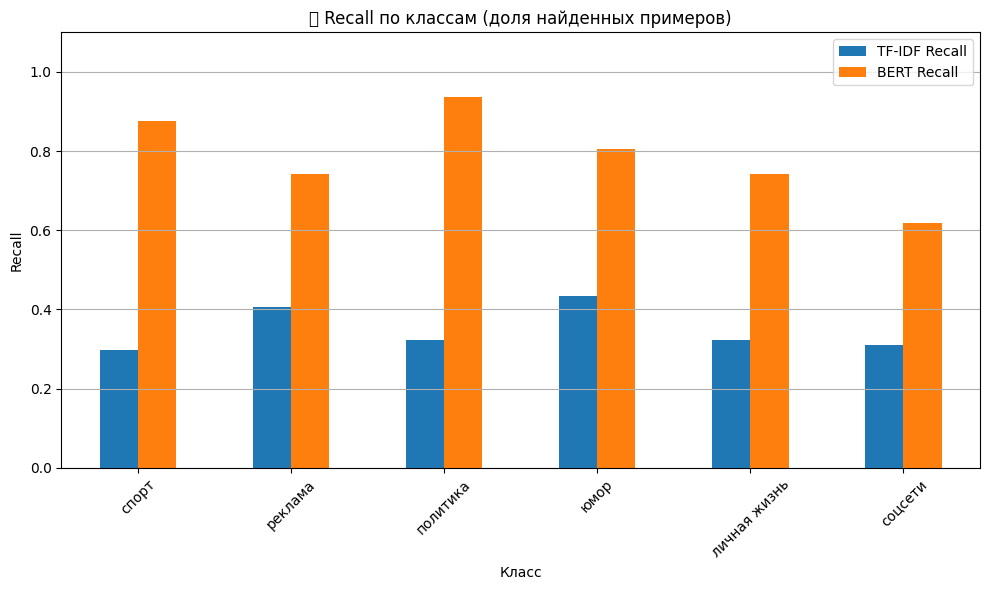

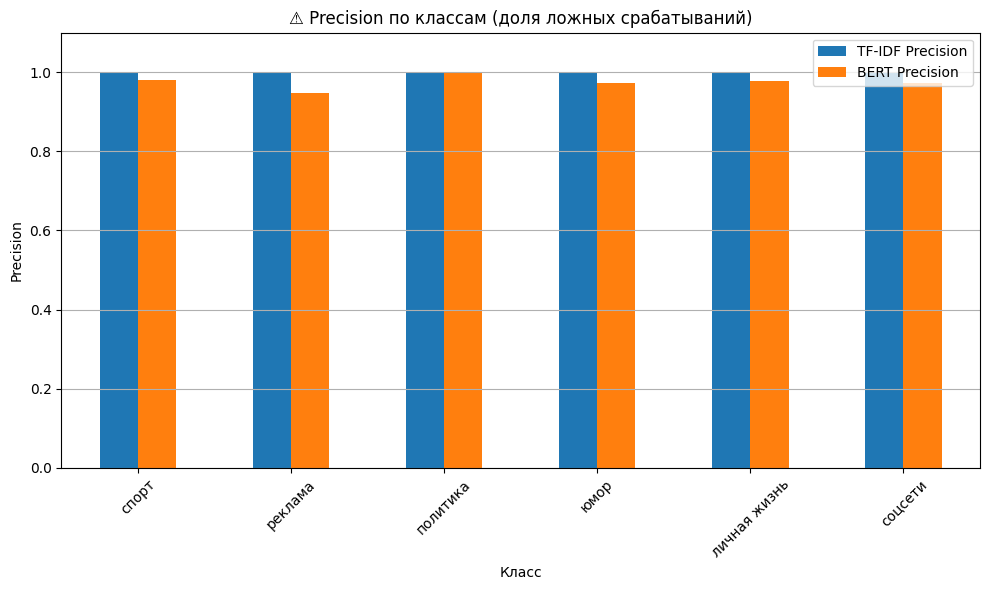

<ipython-input-48-8db2fa2870ef>:93: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


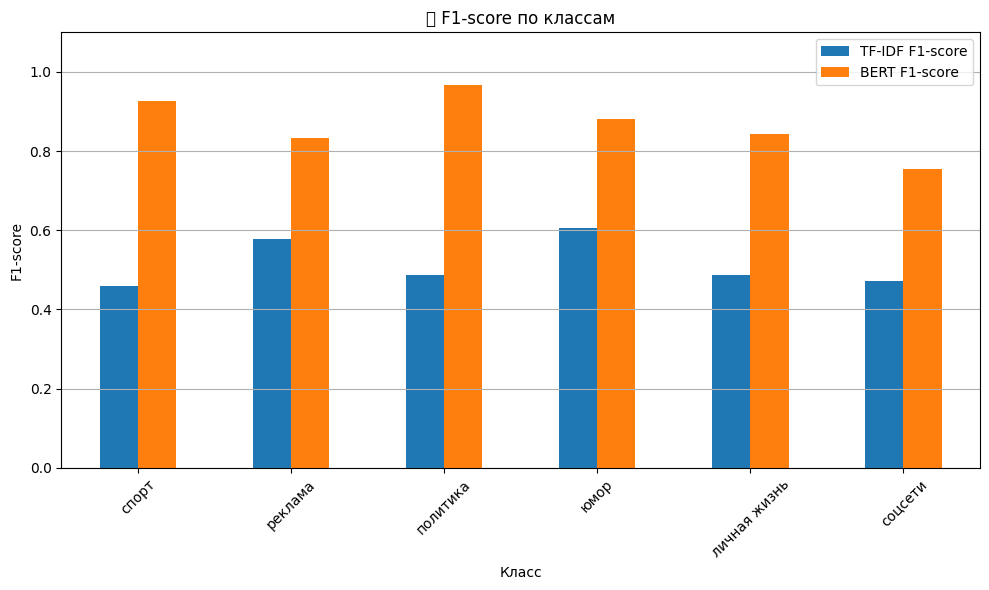

In [48]:
# Установка необходимых библиотек

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report
from sentence_transformers import SentenceTransformer
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_excel("/content/sample_data/augmented_dataset.xlsx")

# Определение колонок
TEXT_COL = "text"
LABEL_COLS = ["спорт", "реклама", "политика", "юмор", "личная жизнь", "соцсети"]

# Очистка
df[TEXT_COL] = df[TEXT_COL].fillna("")
df[LABEL_COLS] = df[LABEL_COLS].fillna(0)
X = df[TEXT_COL]
y = df[LABEL_COLS]

# TF-IDF + LogisticRegression
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(X)
model_tfidf = OneVsRestClassifier(LogisticRegression(max_iter=1000))
model_tfidf.fit(X_tfidf, y)
y_pred_tfidf = model_tfidf.predict(X_tfidf)
report_tfidf = classification_report(y, y_pred_tfidf, output_dict=True, target_names=LABEL_COLS)

# BERT vectorizer
class BERTVectorizer(BaseEstimator, TransformerMixin):
    def __init__(self, model_name='sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2'):
        self.model = SentenceTransformer(model_name)

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return self.model.encode(X.tolist(), convert_to_tensor=False)

# BERT + LogisticRegression
bert_vectorizer = BERTVectorizer()
X_bert = bert_vectorizer.fit_transform(X)
model_bert = OneVsRestClassifier(LogisticRegression(max_iter=1000))
model_bert.fit(X_bert, y)
y_pred_bert = model_bert.predict(X_bert)
report_bert = classification_report(y, y_pred_bert, output_dict=True, target_names=LABEL_COLS)

# Подготовка таблицы с метриками
metrics_table = pd.DataFrame({
    "TF-IDF Precision": [report_tfidf[label]["precision"] for label in LABEL_COLS],
    "TF-IDF Recall": [report_tfidf[label]["recall"] for label in LABEL_COLS],
    "TF-IDF F1-score": [report_tfidf[label]["f1-score"] for label in LABEL_COLS],
    "BERT Precision": [report_bert[label]["precision"] for label in LABEL_COLS],
    "BERT Recall": [report_bert[label]["recall"] for label in LABEL_COLS],
    "BERT F1-score": [report_bert[label]["f1-score"] for label in LABEL_COLS]
}, index=LABEL_COLS)

# График Recall
metrics_table[[ "TF-IDF Recall", "BERT Recall"]].plot(kind="bar", figsize=(10,6))
plt.title("🔍 Recall по классам (доля найденных примеров)")
plt.ylabel("Recall")
plt.xlabel("Класс")
plt.ylim(0, 1.1)
plt.grid(axis="y")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# График Precision
metrics_table[[ "TF-IDF Precision", "BERT Precision"]].plot(kind="bar", figsize=(10,6))
plt.title("⚠️ Precision по классам (доля ложных срабатываний)")
plt.ylabel("Precision")
plt.xlabel("Класс")
plt.ylim(0, 1.1)
plt.grid(axis="y")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# График F1-score
metrics_table[[ "TF-IDF F1-score", "BERT F1-score"]].plot(kind="bar", figsize=(10,6))
plt.title("🎯 F1-score по классам")
plt.ylabel("F1-score")
plt.xlabel("Класс")
plt.ylim(0, 1.1)
plt.grid(axis="y")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
import joblib

# Сохраняем
joblib.dump(model_bert, "bert_model.pkl")
joblib.dump(bert_vectorizer, "bert_vectorizer.pkl")

['bert_vectorizer.pkl']

In [24]:
import os
print("📦 bert_model.pkl существует:", os.path.exists("/content/bert_model.pkl"))
print("📦 bert_vectorizer.pkl существует:", os.path.exists("/content/bert_vectorizer.pkl"))

📦 bert_model.pkl существует: True
📦 bert_vectorizer.pkl существует: True


In [27]:
from sklearn.base import BaseEstimator, TransformerMixin
from sentence_transformers import SentenceTransformer

class BERTVectorizer(BaseEstimator, TransformerMixin):
    def __init__(self, model_name='sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2'):
        self.model = SentenceTransformer(model_name)

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # ✅ УБРАН .tolist()
        return self.model.encode(X, convert_to_tensor=False)

In [28]:
# ✅ Установка Gradio
!pip install -q gradio
import gradio as gr
import joblib

# 📦 Загрузка обученной модели и векторизатора
model_bert = joblib.load("/content/bert_model.pkl")
bert_vectorizer = joblib.load("/content/bert_vectorizer.pkl")

# 🏷 Метки классов (в том же порядке, что и при обучении!)
LABEL_COLS = ["спорт", "реклама", "политика", "юмор", "личная жизнь", "соцсети"]

# 🧠 Функция предсказания
def classify_text(text):
    try:
        # Трансформация текста
        vec = bert_vectorizer.transform([text])  # Важно: подаём список

        # Предсказание
        pred = model_bert.predict(vec)

        # Преобразование бинарного вектора в список меток
        labels = [label for label, present in zip(LABEL_COLS, pred[0]) if present == 1]

        return ", ".join(labels) if labels else "— (нет меток)"
    except Exception as e:
        return f"❌ Ошибка: {str(e)}"

# 🎨 Интерфейс Gradio
interface = gr.Interface(
    fn=classify_text,
    inputs=gr.Textbox(lines=4, placeholder="Введите текст для классификации..."),
    outputs=gr.Textbox(label="Предсказанные метки"),
    title="📋 Тематический классификатор текстов",
    description="Тематики: спорт, юмор, реклама, соцсети, политика, личная жизнь. Один текст может относиться к нескольким меткам.",
    theme="default"
)

# 🚀 Запуск
interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://3fa2c8705670d09e71.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
